In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Load dataset
df = pd.read_csv("heart.csv")  # change filename if needed
print("First 5 rows of the dataset:\n", df.head())


First 5 rows of the dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [17]:
# Check missing values
print("\nMissing values in dataset:\n", df.isnull().sum())

# Replace missing values with mean (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Re-check for missing values
print("\nMissing values after replacement:\n", df.isnull().sum())



Missing values in dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after replacement:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [18]:
# Check for duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Optional: Check for out-of-bound categorical values
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].unique()}")



Duplicate rows: 1

Unique values in categorical columns:


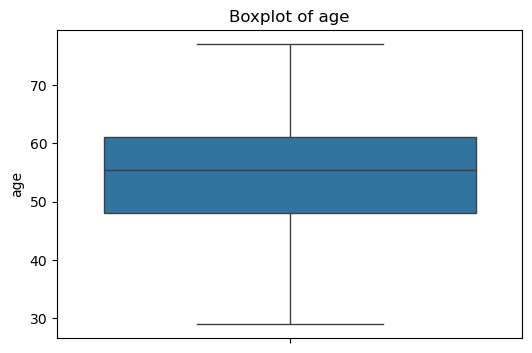

age: 0 outliers found.


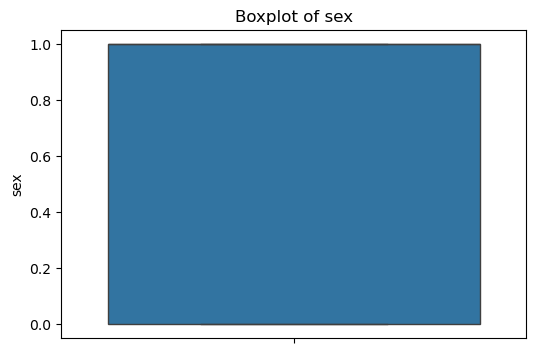

sex: 0 outliers found.


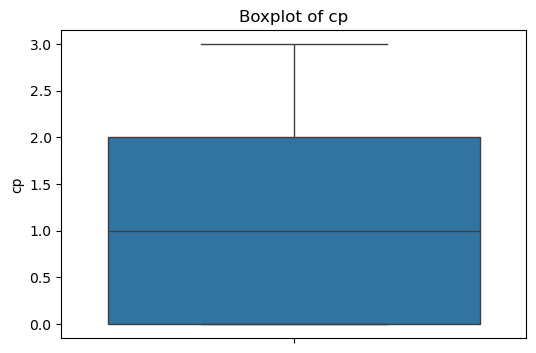

cp: 0 outliers found.


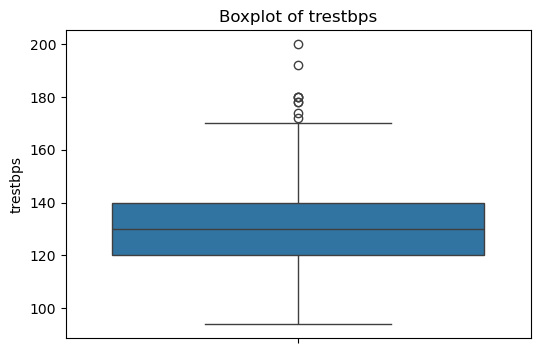

trestbps: 9 outliers found.


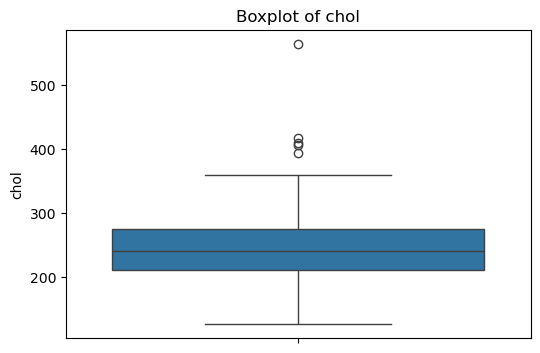

chol: 5 outliers found.


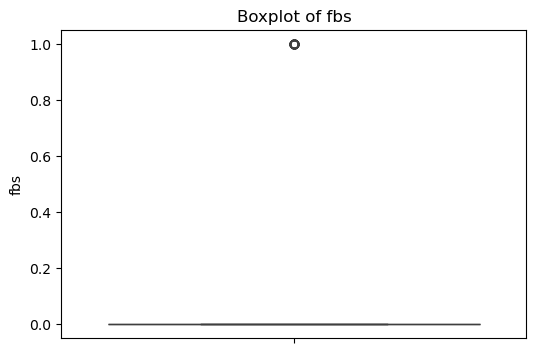

fbs: 45 outliers found.


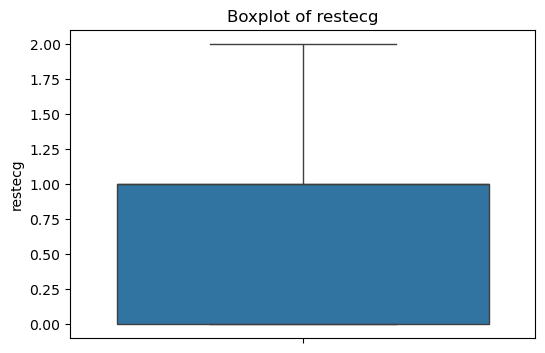

restecg: 0 outliers found.


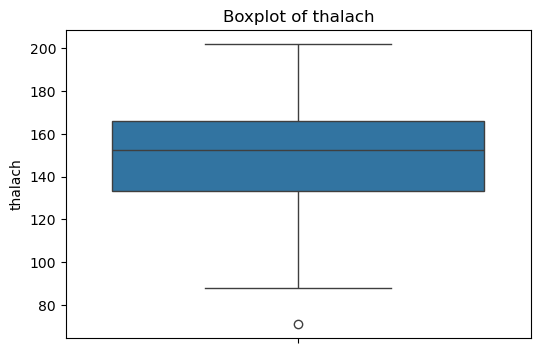

thalach: 1 outliers found.


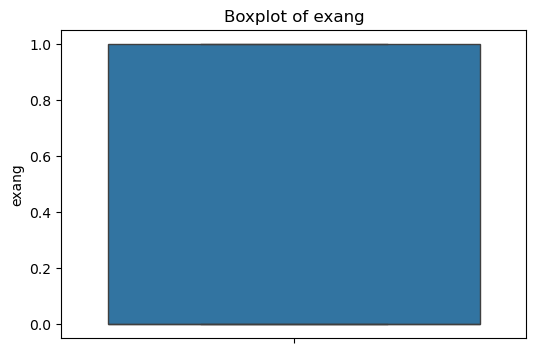

exang: 0 outliers found.


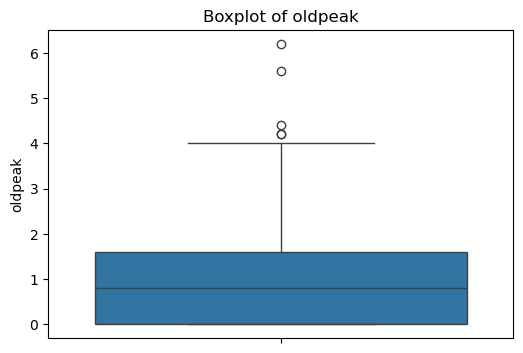

oldpeak: 5 outliers found.


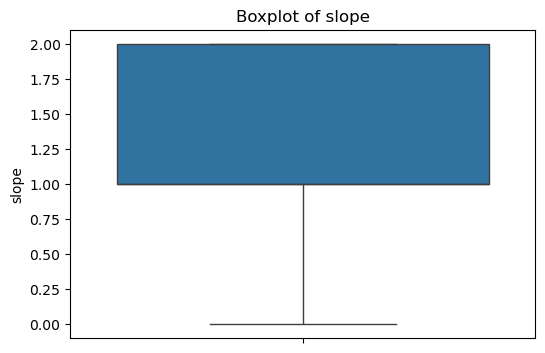

slope: 0 outliers found.


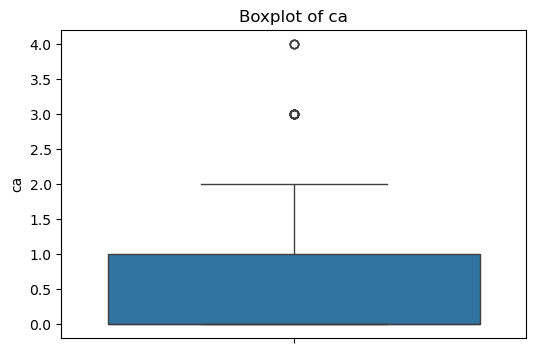

ca: 24 outliers found.


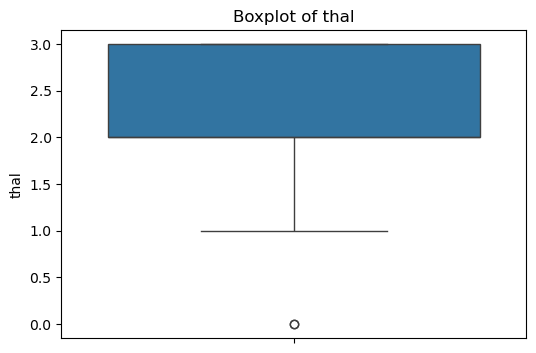

thal: 2 outliers found.


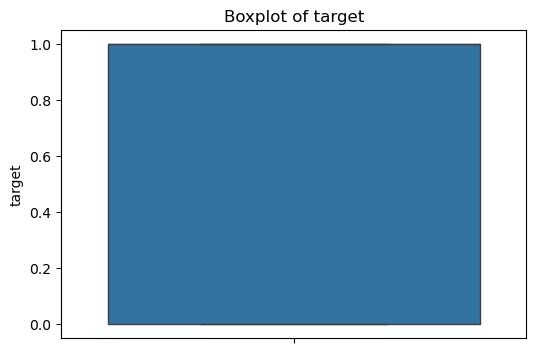

target: 0 outliers found.


In [19]:
# Boxplot for each numerical column
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Detect outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers found.")


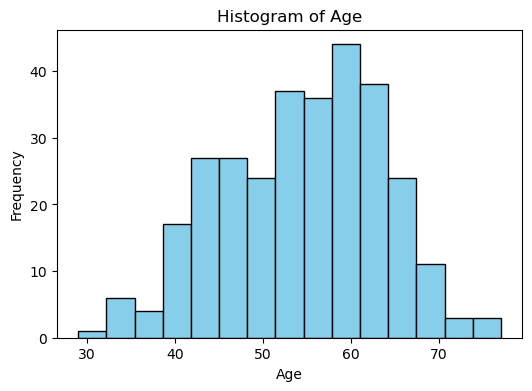

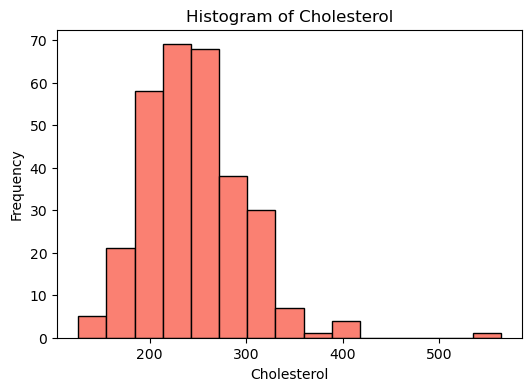

In [20]:
# Histogram for age
plt.figure(figsize=(6, 4))
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Histogram for chol
if 'chol' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df['chol'], bins=15, color='salmon', edgecolor='black')
    plt.title("Histogram of Cholesterol")
    plt.xlabel("Cholesterol")
    plt.ylabel("Frequency")
    plt.show()


In [21]:
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [22]:
print("\nZero counts in each column:")
print((df == 0).sum())



Zero counts in each column:
age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         257
restecg     147
thalach       0
exang       203
oldpeak      98
slope        21
ca          175
thal          2
target      138
dtype: int64


In [23]:
mean_age = df['age'].mean()
print("\nMean Age of Patients:", mean_age)



Mean Age of Patients: 54.420529801324506


In [24]:
print("\nShape of the dataset:", df.shape)



Shape of the dataset: (302, 14)
